<a href="https://colab.research.google.com/github/MxFxM/ColabCodes/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# remember to enable GPU
# this installs all the datasets coming with tenssorflow
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.2.0)


In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

# in new versions of tensorflow this is unnecessary
tf.enable_eager_execution()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
# load dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_data, test_data = dataset['train'], dataset['test']

In [0]:
# map value to string
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# preprocess
def normalize(images, labels):
  print(images, labels)
  images = tf.cast(images, tf.float32)
  images = images / 255
  print(images, labels)
  return images, labels

train_data = train_data.map(normalize)
print(train_data)
test_data = test_data.map(normalize)

Tensor("args_0:0", shape=(28, 28, 1), dtype=uint8) Tensor("args_1:0", shape=(), dtype=int64)
Tensor("truediv:0", shape=(28, 28, 1), dtype=float32) Tensor("args_1:0", shape=(), dtype=int64)
<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>
Tensor("args_0:0", shape=(28, 28, 1), dtype=uint8) Tensor("args_1:0", shape=(), dtype=int64)
Tensor("truediv:0", shape=(28, 28, 1), dtype=float32) Tensor("args_1:0", shape=(), dtype=int64)


In [0]:
# setup the layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
    #tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
    #tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# compile model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# fit / train model (with gpu if activated)
BATCH_SIZE = 32
NUM_TRAIN_EXAMPLES = 60_000
EPOCHS = 5

train_data = train_data.repeat().shuffle(NUM_TRAIN_EXAMPLES).batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

model.fit(train_data, epochs=EPOCHS, steps_per_epoch=math.ceil(NUM_TRAIN_EXAMPLES/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4327 - acc: 0.8418
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2940 - acc: 0.8927
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2490 - acc: 0.9086
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2157 - acc: 0.9189
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1872 - acc: 0.9300


In [0]:
# evaluate
NUM_TEST_EXAMPLES = 10_000

test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(NUM_TEST_EXAMPLES/BATCH_SIZE))

313/313 [==============================] - 3s 10ms/step - loss: 0.2528 - acc: 0.9097


In [0]:
# make some predictions
for test_images, test_labels in test_data.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [0]:
# fancy plots
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

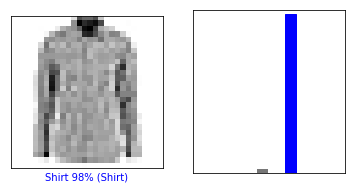

In [0]:
# show item 0
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

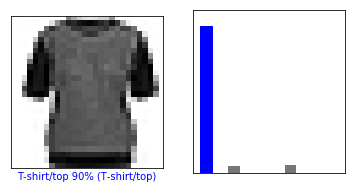

In [0]:
# show item 12
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

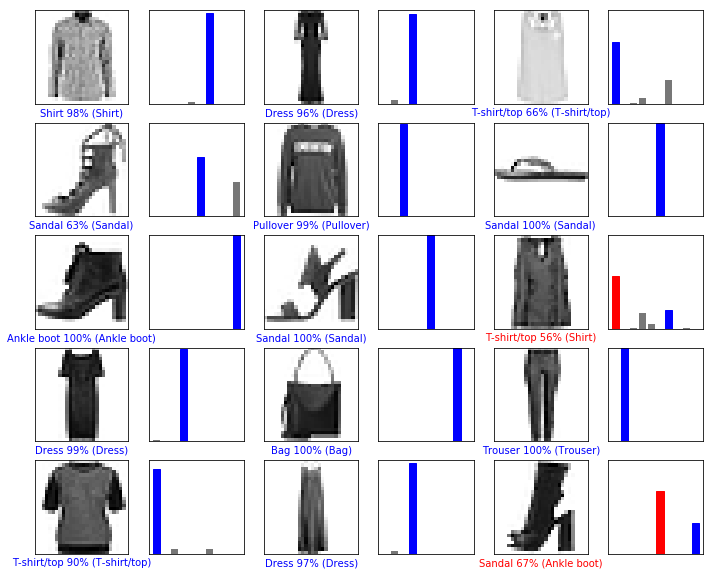

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)